In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
df=pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")

In [49]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [50]:
df.shape

(4340, 8)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [52]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [53]:
print(df["fuel"].unique())
print(df["seller_type"].unique())
print(df["transmission"].unique())
print(df["owner"].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [54]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [55]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [56]:
df2 = df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]

In [57]:
df2.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [58]:
df2["current_year"] = 2022

In [59]:
df2.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022


In [60]:
df2["no_years"]=df2["current_year"]-df2["year"]
df2.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_years
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,10
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022,5
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8


In [61]:
df2.drop(["year"],axis=1,inplace=True)

In [62]:
df2.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_years
0,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,600000,100000,Diesel,Individual,Manual,First Owner,2022,10
3,250000,46000,Petrol,Individual,Manual,First Owner,2022,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8


In [63]:
df2.drop(["current_year"],axis=1,inplace=True)

In [64]:
df2.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_years
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
labelencoder = LabelEncoder()

In [67]:
df2['fuel_num'] = labelencoder.fit_transform(df2['fuel'])
df2

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_years,fuel_num
0,60000,70000,Petrol,Individual,Manual,First Owner,15,4
1,135000,50000,Petrol,Individual,Manual,First Owner,15,4
2,600000,100000,Diesel,Individual,Manual,First Owner,10,1
3,250000,46000,Petrol,Individual,Manual,First Owner,5,4
4,450000,141000,Diesel,Individual,Manual,Second Owner,8,1
...,...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,8,1
4336,409999,80000,Diesel,Individual,Manual,Second Owner,8,1
4337,110000,83000,Petrol,Individual,Manual,Second Owner,13,4
4338,865000,90000,Diesel,Individual,Manual,First Owner,6,1


In [68]:
df2['fuel_num'] = labelencoder.fit_transform(df2['fuel'])
df2['seller_type_num'] = labelencoder.fit_transform(df2['seller_type'])
df2['transmission_num'] = labelencoder.fit_transform(df2['transmission'])
df2["owner_num"] = labelencoder.fit_transform(df2["owner"])
df2

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_years,fuel_num,seller_type_num,transmission_num,owner_num
0,60000,70000,Petrol,Individual,Manual,First Owner,15,4,1,1,0
1,135000,50000,Petrol,Individual,Manual,First Owner,15,4,1,1,0
2,600000,100000,Diesel,Individual,Manual,First Owner,10,1,1,1,0
3,250000,46000,Petrol,Individual,Manual,First Owner,5,4,1,1,0
4,450000,141000,Diesel,Individual,Manual,Second Owner,8,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,8,1,1,1,2
4336,409999,80000,Diesel,Individual,Manual,Second Owner,8,1,1,1,2
4337,110000,83000,Petrol,Individual,Manual,Second Owner,13,4,1,1,2
4338,865000,90000,Diesel,Individual,Manual,First Owner,6,1,1,1,0


In [69]:
print(df2["fuel_num"].unique())
print(df2["seller_type_num"].unique())
print(df2["transmission_num"].unique())
print(df2["owner_num"].unique())

[4 1 0 3 2]
[1 0 2]
[1 0]
[0 2 1 4 3]


In [70]:
df2.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_years,fuel_num,seller_type_num,transmission_num,owner_num
0,60000,70000,Petrol,Individual,Manual,First Owner,15,4,1,1,0
1,135000,50000,Petrol,Individual,Manual,First Owner,15,4,1,1,0
2,600000,100000,Diesel,Individual,Manual,First Owner,10,1,1,1,0
3,250000,46000,Petrol,Individual,Manual,First Owner,5,4,1,1,0
4,450000,141000,Diesel,Individual,Manual,Second Owner,8,1,1,1,2


In [86]:
df2.drop(["fuel"],axis=1)

,selling_price,km_driven,no_years,fuel_num,seller_type_num,transmission_num,owner_num
0,60000,70000,15,4,1,1,0
1,135000,50000,15,4,1,1,0
2,600000,100000,10,1,1,1,0
3,250000,46000,5,4,1,1,0
4,450000,141000,8,1,1,1,2
...,...,...,...,...,...,...,...
4335,409999,80000,8,1,1,1,2
4336,409999,80000,8,1,1,1,2
4337,110000,83000,13,4,1,1,2
4338,865000,90000,6,1,1,1,0


In [90]:
df2.drop(["fuel","seller_type","transmission",	"owner"],axis=1,inplace=True)

KeyError: ignored

In [89]:
df2.head()

,selling_price,km_driven,fuel,no_years,fuel_num,seller_type_num,transmission_num,owner_num
0,60000,70000,Petrol,15,4,1,1,0
1,135000,50000,Petrol,15,4,1,1,0
2,600000,100000,Diesel,10,1,1,1,0
3,250000,46000,Petrol,5,4,1,1,0
4,450000,141000,Diesel,8,1,1,1,2


In [91]:
df2.drop(["fuel"],axis=1,inplace=True)
df2

,selling_price,km_driven,no_years,fuel_num,seller_type_num,transmission_num,owner_num
0,60000,70000,15,4,1,1,0
1,135000,50000,15,4,1,1,0
2,600000,100000,10,1,1,1,0
3,250000,46000,5,4,1,1,0
4,450000,141000,8,1,1,1,2
...,...,...,...,...,...,...,...
4335,409999,80000,8,1,1,1,2
4336,409999,80000,8,1,1,1,2
4337,110000,83000,13,4,1,1,2
4338,865000,90000,6,1,1,1,0


In [92]:
df2.corr()

,selling_price,km_driven,no_years,fuel_num,seller_type_num,transmission_num,owner_num
selling_price,1.000000,-0.192289,-0.413922,-0.269653,-0.151554,-0.530205,-0.207840
km_driven,-0.192289,1.000000,0.419688,-0.286095,0.113689,0.120226,0.297115
no_years,-0.413922,0.419688,1.000000,0.120002,0.098352,0.143800,0.414705
fuel_num,-0.269653,-0.286095,0.120002,1.000000,0.038797,0.039249,-0.010910
seller_type_num,-0.151554,0.113689,0.098352,0.038797,1.000000,0.174925,0.165681
transmission_num,-0.530205,0.120226,0.143800,0.039249,0.174925,1.000000,0.078893
owner_num,-0.207840,0.297115,0.414705,-0.010910,0.165681,0.078893,1.000000


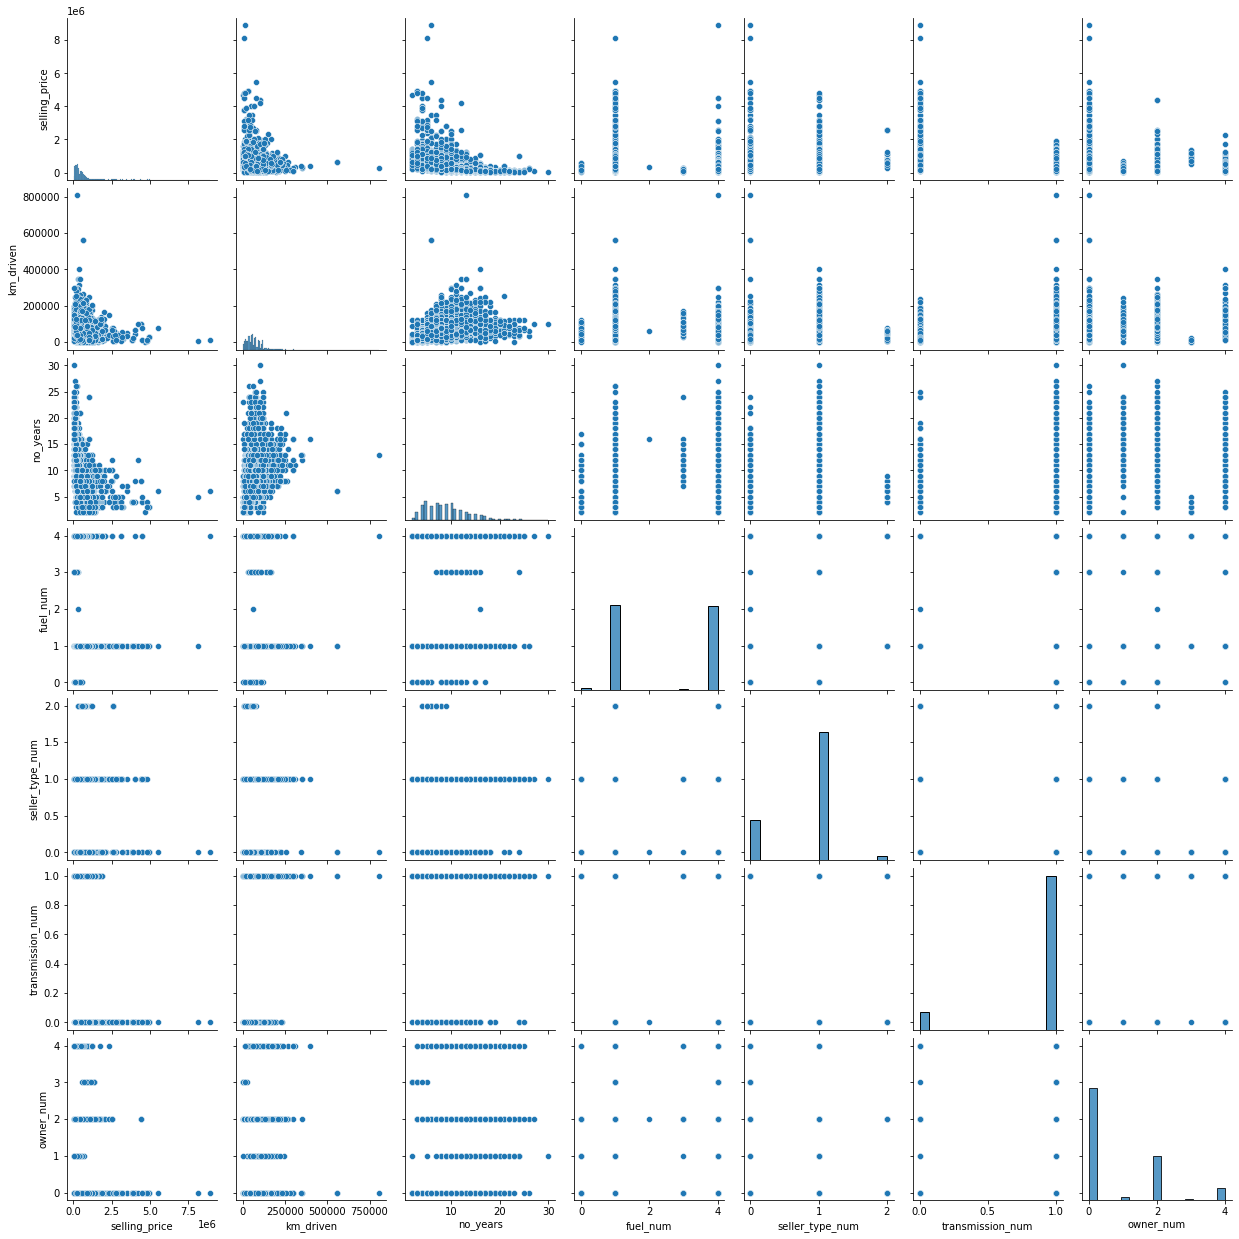

In [75]:
sns.pairplot(df2)

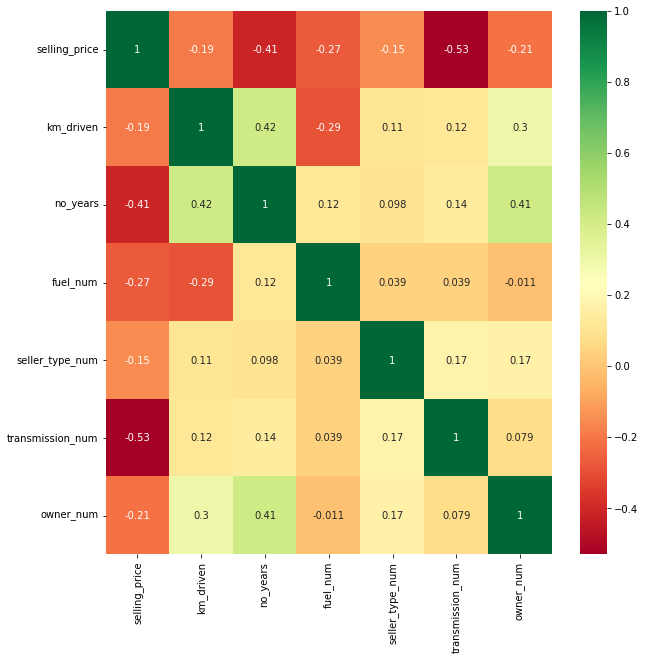

In [80]:
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g = sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap = 'RdYlGn')

In [93]:
X= df2.iloc[:,1:]
y = df2.iloc[:,0]

In [94]:
X.head()

,km_driven,no_years,fuel_num,seller_type_num,transmission_num,owner_num
0,70000,15,4,1,1,0
1,50000,15,4,1,1,0
2,100000,10,1,1,1,0
3,46000,5,4,1,1,0
4,141000,8,1,1,1,2


In [95]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [96]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [97]:
print(model.feature_importances_)

[0.24134128 0.2451928  0.12939264 0.05965674 0.29282786 0.03158868]


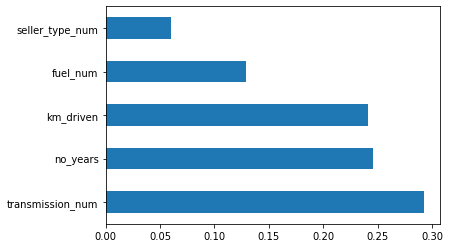

In [99]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [101]:
X_train.shape

(3472, 6)

In [105]:
X_test.shape

(868, 6)

In [106]:
from sklearn.ensemble import RandomForestRegressor
rf_random= RandomForestRegressor()

In [107]:
#Hyperparameters
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [110]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [111]:
rf = RandomForestRegressor()

In [112]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random= RandomizedSearchCV(estimator = rf,param_distributions =random_grid,scoring='neg_mean_squared_error',n_iter = 10, cv = 5, verbose=2, random_state=42,n_jobs=1)

In [114]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [115]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [116]:
rf_random.best_score_

-100219733378.5778

In [117]:
predictions=rf_random.predict(X_test)

In [118]:
predictions

array([ 428987.36507937,  583777.72619048, 1067609.32557143,
         81981.83233333,  348338.19306171,  301153.42728513,
        202561.10788095, 1341718.00824176,  186961.05833333,
        314702.61733733,  519566.61279407,  414563.58533333,
        519566.61279407,  128722.1495    ,  192221.30494048,
        520102.55443113,  199447.55238095,  498654.11076541,
        816343.40075789,  643189.14977098,  146209.4960595 ,
        386552.29947422,  497794.19047619, 1397738.68465397,
       1680994.        ,  257575.61006746,  413627.81914674,
        362180.44913095,   68042.5       , 1028513.91520979,
        487219.0952381 ,  344076.72152814,  528284.50185913,
         66868.33333333,  292011.28953405,  244432.66666667,
        218112.3961039 ,  215517.80252381,  679331.26984127,
        941480.44899286,  314308.911     ,  154216.61340861,
       2281061.        ,  272899.46017678,  103170.5       ,
        105444.07046609,  172193.48685204,  599705.24611429,
       1053899.76554001,

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


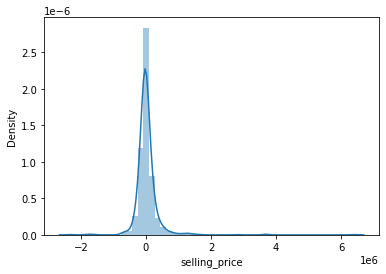

In [119]:
sns.distplot(y_test-predictions)

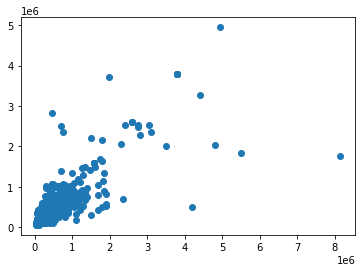

In [120]:
plt.scatter(y_test,predictions)

In [121]:
from sklearn import metrics

In [122]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 171300.09157895713
MSE: 160416197675.33002
RMSE: 400519.9092121764


In [123]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)